In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Set global font properties
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'


# Reference Values

B = 3               # Number of blades [-]
# R = 89              # Blade radius [m]
TSR = 8             # Tip Speed Ratio [-]
aoa_design = 5      # Angle of attack [deg]

r_R = np.linspace(0.01, 1, 100)    # Non-dim radius[-]


# Variables to change

B_array = np.arange(2, 6, 1)
TSR_array = np.arange(6, 11, 1)
aoa_design_array = np.arange(3, 8, 1)



In [2]:
def calculate_C_l_design(aoa_design):

    C_l_design = (2 * np.pi)**2 / 360 * aoa_design + 0.452  # [-]
    
    return C_l_design

Cl_design = calculate_C_l_design(aoa_design)
Cl_design_array = calculate_C_l_design(aoa_design_array)


# Chord functions

In [3]:

# Function to calculate c_R (some coefficient) based on parameters
def calculate_c_R_Cl(r_R, B_array, C_l_design_array, TSR_array):
    """
    Calculate the c_R_Cl coefficient and return a dictionary with 5 NumPy arrays.

    Parameters:
    r_R: Array of non-dimensional radius values [-]
    B_array: Array of blade numbers [-]
    C_l_design_array: Array of lift coefficient values [-]
    TSR_array: Array of tip-speed ratio values [-]
    
    Returns:
    c_R_dict: A dictionary with 5 NumPy arrays, each representing c_R for the input arrays.
    """
    c_R_Cl = {}

    # Generate 5 different c_R arrays using combinations of the input arrays
    for i in range(len(C_l_design_array)):
        # For each array, calculate c_R with different combinations of inputs
        c_R_array = (16 * np.pi / 9) / (r_R * B_array * C_l_design_array[i] * TSR_array**2)
        
        # Store the resulting c_R array in the dictionary with a key
        c_R_Cl[f'c_l_{i+1}'] = c_R_array

    return c_R_Cl


def calculate_c_R_TSR(r_R, B_array, C_l_design_array, TSR_array):
    """
    Calculate the c_R_Cl coefficient and return a dictionary with 5 NumPy arrays.

    Parameters:
    r_R: Array of non-dimensional radius values [-]
    B_array: Array of blade numbers [-]
    C_l_design_array: Array of lift coefficient values [-]
    TSR_array: Array of tip-speed ratio values [-]
    
    Returns:
    c_R_dict: A dictionary with 5 NumPy arrays, each representing c_R for the input arrays.
    """
    c_R_TSR = {}

    # Generate 5 different c_R arrays using combinations of the input arrays
    for i in range(len(TSR_array)):
        # For each array, calculate c_R with different combinations of inputs
        c_R_array = (16 * np.pi / 9) / (r_R * B_array * C_l_design_array * TSR_array[i]**2)
        
        # Store the resulting c_R array in the dictionary with a key
        c_R_TSR[f'TSR_{i+1}'] = c_R_array

    return c_R_TSR

def calculate_c_R_B(r_R, B_array, C_l_design_array, TSR_array):
    """
    Calculate the c_R_Cl coefficient and return a dictionary with 5 NumPy arrays.

    Parameters:
    r_R: Array of non-dimensional radius values [-]
    B_array: Array of blade numbers [-]
    C_l_design_array: Array of lift coefficient values [-]
    TSR_array: Array of tip-speed ratio values [-]
    
    Returns:
    c_R_dict: A dictionary with 5 NumPy arrays, each representing c_R for the input arrays.
    """
    c_R_B = {}

    # Generate 5 different c_R arrays using combinations of the input arrays
    for i in range(len(B_array)):
        # For each array, calculate c_R with different combinations of inputs
        c_R_array = (16 * np.pi / 9) / (r_R * B_array[i] * C_l_design_array * TSR_array**2)
        
        # Store the resulting c_R array in the dictionary with a key
        c_R_B[f'B_{i+1}'] = c_R_array

    return c_R_B

    

# Twist functions

In [4]:

# Function to calculate the twist based on r_R, TSR, and aoa_design
def calculate_twist_Cl(r_R, TSR_array, aoa_design_array):
    
    twist_Cl = {}
    
    for i in range(len(aoa_design_array)):
        
        twist = np.arctan((2 / 3) / (r_R * TSR_array)) - np.deg2rad(aoa_design_array[i])  # [rad]
        
        twist_Cl[f'AoA_{i+1}'] = twist
        
    return twist_Cl

# Function to calculate the twist based on r_R, TSR, and aoa_design
def calculate_twist_TSR(r_R, TSR_array, aoa_design_array):
    
    twist_TSR = {}
    
    for i in range(len(TSR_array)):
        
        twist = np.arctan((2 / 3) / (r_R * TSR_array[i])) - np.deg2rad(aoa_design_array)  # [rad]
        
        twist_TSR[f'AoA_{i+1}'] = twist
        
    return twist_TSR


# Calculate distributions

In [5]:
c_R_Cl = calculate_c_R_Cl(r_R, B, Cl_design_array, TSR)
c_R_TSR = calculate_c_R_TSR(r_R, B, Cl_design, TSR_array)
c_R_B = calculate_c_R_B(r_R, B_array, Cl_design, TSR)

twist_Cl = calculate_twist_Cl(r_R, TSR, aoa_design_array)
twist_TSR = calculate_twist_TSR(r_R, TSR_array, aoa_design)

# Inflow angle distribution

phi_array = 2/3 / (TSR * r_R) # [rad]


# Plots (Chord)

<Figure size 640x480 with 0 Axes>

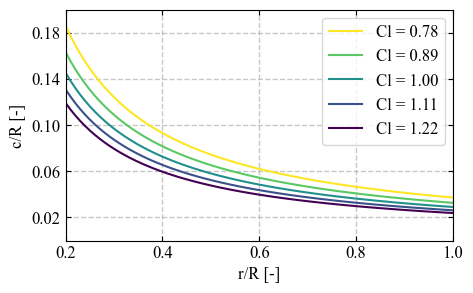

<Figure size 640x480 with 0 Axes>

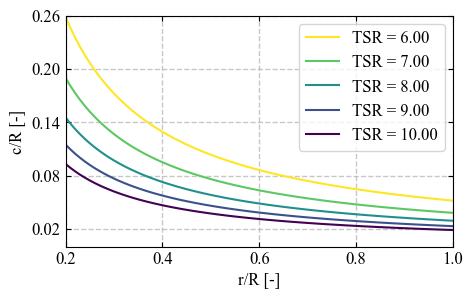

<Figure size 640x480 with 0 Axes>

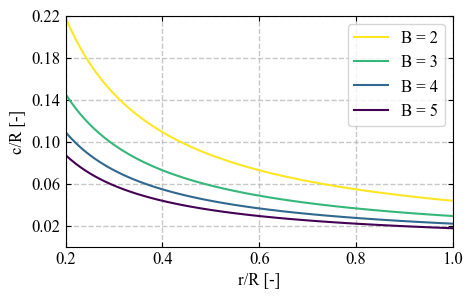

In [6]:
# Cl_design

# Create the figure and colormap
plt.figure()
cmap = plt.get_cmap('viridis_r')

# Number of lines to plot
n_lines = len(c_R_Cl)

figure = plt.figure(figsize=(5, 3))

# Loop over the dictionary keys to plot each set of c_R values
for i, key in enumerate(c_R_Cl.keys()):
    line_color = cmap(i / (n_lines - 1))  # Dynamically select color from colormap
    
    Cl_value = Cl_design_array[i]  # Use the i-th element from C_l_design_array

    # Plot the data with the dynamically generated label
    plt.plot(r_R, c_R_Cl[key], c=line_color, label=f'Cl = {Cl_value:.2f}')  # Format Cl with 2 decimal places

# Add labels and title
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major') 
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.ylabel('c/R [-]')
plt.xlabel(r'r/R [-]')
plt.xlim([0.2, 1])
plt.ylim([0, 0.2])
plt.yticks(np.arange(0.02, 0.21, 0.04))
plt.legend()
plt.savefig('Plots/c_R_Cl.pdf', dpi=300, bbox_inches='tight')



# TSR

# Create the figure and colormap
plt.figure()
cmap = plt.get_cmap('viridis_r')

# Number of lines to plot
n_lines = len(c_R_TSR)

figure = plt.figure(figsize=(5, 3))

# Loop over the dictionary keys to plot each set of c_R values
for i, key in enumerate(c_R_TSR.keys()):
    line_color = cmap(i / (n_lines - 1))  # Dynamically select color from colormap
    
    TSR_value = TSR_array[i]  # Use the i-th element from C_l_design_array

    # Plot the data with the dynamically generated label
    plt.plot(r_R, c_R_TSR[key], c=line_color, label=f'TSR = {TSR_value:.2f}')  # Format Cl with 2 decimal places

# Add labels and title
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major') 
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.ylabel('c/R [-]')
plt.xlabel(r'r/R [-]')
plt.xlim([0.2, 1])
plt.ylim([0, 0.2])
plt.yticks(np.arange(0.02, 0.31, 0.06))
plt.legend()
plt.savefig('Plots/c_R_TSR.pdf', dpi=300, bbox_inches='tight')



# B

# Create the figure and colormap
plt.figure()
cmap = plt.get_cmap('viridis_r')

# Number of lines to plot
n_lines = len(c_R_B)

figure = plt.figure(figsize=(5, 3))

# Loop over the dictionary keys to plot each set of c_R values
for i, key in enumerate(c_R_B.keys()):
    line_color = cmap(i / (n_lines - 1))  # Dynamically select color from colormap
    
    B_value = B_array[i]  # Use the i-th element from C_l_design_array

    # Plot the data with the dynamically generated label
    plt.plot(r_R, c_R_B[key], c=line_color, label=f'B = {B_value:.0f}')  # Format Cl with 2 decimal places

# Add labels and title
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major') 
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.ylabel('c/R [-]')
plt.xlabel(r'r/R [-]')
plt.xlim([0.2, 1])
plt.ylim([0, 0.2])
plt.yticks(np.arange(0.02, 0.25, 0.04))
plt.legend()
plt.savefig('Plots/c_R_B.pdf', dpi=300, bbox_inches='tight')




# Plots (Twist)

<Figure size 640x480 with 0 Axes>

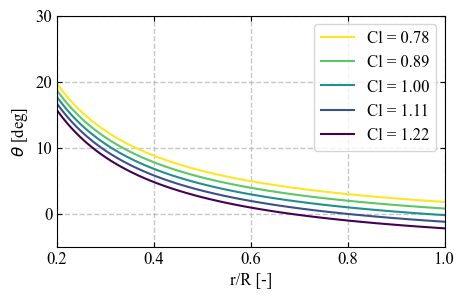

<Figure size 640x480 with 0 Axes>

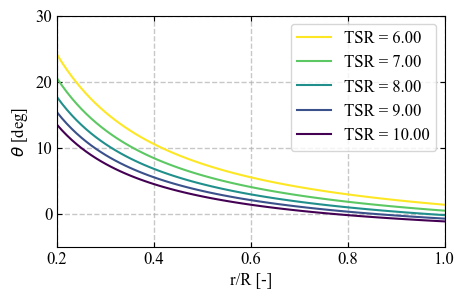

In [7]:
# Cl_design

# Create the figure and colormap
plt.figure()
cmap = plt.get_cmap('viridis_r')

# Number of lines to plot
n_lines = len(twist_Cl)

figure = plt.figure(figsize=(5, 3))

# Loop over the dictionary keys to plot each set of c_R values
for i, key in enumerate(twist_Cl.keys()):
    line_color = cmap(i / (n_lines - 1))  # Dynamically select color from colormap
    
    Cl_value = Cl_design_array[i]  # Use the i-th element from C_l_design_array

    # Plot the data with the dynamically generated label
    plt.plot(r_R, np.rad2deg(twist_Cl[key]), c=line_color, label=f'Cl = {Cl_value:.2f}')  # Format Cl with 2 decimal places

# Add labels and title
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major') 
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.ylabel(r'$\theta$ [deg]' )
plt.xlabel(r'r/R [-]')
plt.xlim([0.2, 1])
plt.ylim([-5, 30])
plt.legend()
plt.savefig('Plots/twist_Cl.pdf', dpi=300, bbox_inches='tight')


# TSR

# Create the figure and colormap
plt.figure()
cmap = plt.get_cmap('viridis_r')

# Number of lines to plot
n_lines = len(twist_TSR)

figure = plt.figure(figsize=(5, 3))

# Loop over the dictionary keys to plot each set of c_R values
for i, key in enumerate(twist_TSR.keys()):
    line_color = cmap(i / (n_lines - 1))  # Dynamically select color from colormap
    
    TSR_value = TSR_array[i]  # Use the i-th element from C_l_design_array

    # Plot the data with the dynamically generated label
    plt.plot(r_R, np.rad2deg(twist_TSR[key]), c=line_color, label=f'TSR = {TSR_value:.2f}')  # Format Cl with 2 decimal places

# Add labels and title
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major') 
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.ylabel(r'$\theta$ [deg]' )
plt.xlabel(r'r/R [-]')
plt.xlim([0.2, 1])
plt.ylim([-5, 30])
plt.legend()
plt.savefig('Plots/twist_TSR.pdf', dpi=300, bbox_inches='tight')

# Inflow angle Plot

<Figure size 640x480 with 0 Axes>

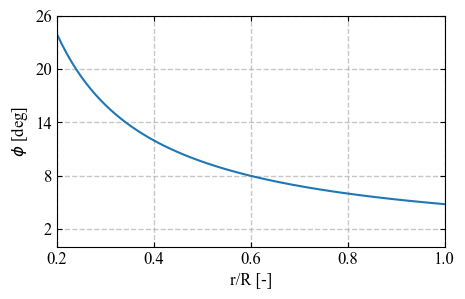

In [8]:
# Create the figure and colormap
plt.figure()

figure = plt.figure(figsize=(5, 3))

# Plot the data with the dynamically generated label
plt.plot(r_R, np.rad2deg(phi_array))  # Format Cl with 2 decimal places

# Add labels and title
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major') 
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.ylabel(r'$\phi$ [deg]' )
plt.xlabel(r'r/R [-]')
plt.xlim([0.2, 1])
plt.ylim([0, 25])
plt.yticks(np.arange(2, 31, 6))

plt.savefig('Plots/inflow_angle.pdf', dpi=300, bbox_inches='tight')